# Paper: Dynamics of HIV infection of CD4+ T cells

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

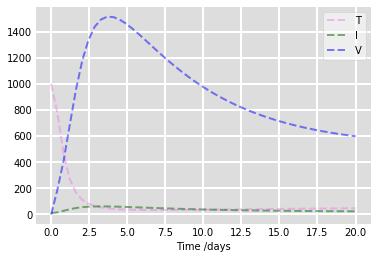

In [2]:
# Initial conditions
T0 = 1000
I0 = 10
V0 = 10e-3

# A grid of time points (in days)
t = np.linspace(0, 20, 50) 

#parameters
s = 10
mu_T = 0.02
mu_I = 0.26
mu_b = 0.24
mu_V = 2.4
r = 0.03
N = 250
T_max = 1500
k1 = 2.4*10e-5
k1_prime = 2*10e-5


# The SIR model differential equations.
def deriv(y, t, s, mu_T, mu_V, mu_b, r, N, T_max, k1, k1_prime):
    T, I, V = y
    dTdt = s - mu_T * T + r * T * (1 - ((T + I) / T_max) - k1 * V * T)
    dIdt = k1_prime * V * T - mu_I * I
    dVdt = N * mu_b * I - k1 * V * T - mu_V * V

    return dTdt, dIdt, dVdt


# Initial conditions vector
y0 = T0, I0, V0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(s, mu_T, mu_V, mu_b, r, N, T_max, k1, k1_prime))
T, I, V = ret.T

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, T, 'violet', alpha=0.5, lw=2, label='T', linestyle='dashed')
ax.plot(t, I, 'darkgreen', alpha=0.5, lw=2, label='I', linestyle='dashed')
ax.plot(t, V, 'blue', alpha=0.5, lw=2, label='V', linestyle='dashed')
ax.set_xlabel('Time /days')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [3]:
#save to csv file
a = np.asarray([t, T, I, V]) 

#np.savetxt("hiv.csv", a, delimiter=",")